<h1>Group Project: considerations on demographic of self-taught coders</h1>
<br><br>
<h2>Introduction</h2>
<p align="justify">
With the purpose of understanding a bit better the profile of self-taught online students that are part of the “Learn to Code” movement the Team 39 agreed that we would use data freely available on Kaggle platform, made available by freeCodeCamp to understand different profiles presented and find relevant trends to understand strong influence that trend alrady have and help finding "niches" where engagement can be reinforced in order to broaden the reach of movement.
</p>
<br>
<h2>Data analysed</h2>
<p align="justify">For this study we will use data made available online by freeCodeCamp (https://github.com/freeCodeCamp/2016-new-coder-survey ).
The survey was designed by CodeNewbie and Free Code Camp as an anonymous 5-minute survey, to with more than 15,000 participants from 169 countries have answered to from March 28 through May 2 (2016).
The 2016 New Coder Survey is made available under the Open Database License: http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
</p>
<br>
<h2>Definition of activities</h2>
<p align="justify">Udacity Data Scholars beneficiaries of Bertelsmann Data Science Challenge Scholarship Course and participants of Team 39 listed different interesting aspects that could be derived from questions available on survey, the suggestions were voted and top three divided between each of three subgroups, as follows:
</p>

|<p align="center">Question<br>IDs</p>|<p align="left">Topic</p>|<p align="left">Subgroup</p>|
|-----|--------------------|----------|
|<p align="center"> 1.09; 2.04; 2.08</p>|<p align="justify">Questions “2.08. What’s the highest degree or level of school you have completed? (If currently enrolled, highest degree received.)”, “1.09: Which learning resources have you found helpful?” and “2.04: Which country do you currently live in?”</p>|<p align="left">Butterflies - Isabel Martinez (IM), Kara de la Marck (KM), Loretta Rehm (LR), Nelly Hilmane (NH)</p>|
|<p align="center">1.01; 1.03; 1.09</p>|<p align="justify">1.01. Are you already working as a software developer? 1.03. Which one of these roles are you most interested in? 1.09. Which learning resources have you found helpful?- To determine the popularity of online courses/self study.</p>|<p align="left">Dragonflies - Kashan Khan (K.K), Mohamed Hassona (MH), Ramya Kameshwar (RK)</p>|
|<p align="center">1.11; 2.01; 2.02</p>|<p align="justify">2.01. compare age, 2.02. gender to 1.11. hours spent studying</p>|<p align="left">Ladybirds - Ana Porubova (AP), Ana Sustic (AS), Elena Lestini (EL), Rudo N Takavarasha (RNT)</p>|

<p align="justify">
<h3>Questions from survey that were analysed after subgroup reviewed the data are:</h3>
<br>
1.09: Which learning resources have you found helpful?<br>
2.04: Which country do you currently live in?<br>
2.08: What's the highest degree or level of school you have completed? (If currently enrolled, highest degree received.)
<br><br>
With the purpose to highlight the variance on level of education of people using online courses (resources) included in the survey.
</p>

In [13]:
#Import libraries needed
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Set dataframe with csv (buffering due to size)
rawURL = 'https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv'
reader = pd.read_csv(rawURL, sep = ',', dtype = str, iterator=True, chunksize=10000, engine = 'python', encoding = 'utf-8')
df = pd.concat(reader,ignore_index = True)

#Columns to consider
selected_columns = ["ID.x","CountryLive","SchoolDegree",
                    "ResourceBlogs","ResourceBooks","ResourceCodecademy","ResourceCodeWars","ResourceCoursera",
                    "ResourceDevTips","ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle",
                    "ResourceHackerRank","ResourceKhanAcademy","ResourceLynda","ResourceMDN","ResourceOdinProj",
                    "ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn",
                    "ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools",
                    "ResourceYouTube"]

df_selected = df.loc[:,selected_columns]
print(len(df_selected)) # 15620
df_selected = df_selected[df_selected['CountryLive'] != 'nan']
df_selected = df_selected[df_selected['SchoolDegree'] != 'nan']
print(len(df_selected)) # 13506

15620
13506


In [15]:
#Variables
resource_count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_high = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resource_other = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def clean_list(list_to_clean, value=0):
    for i in range(len(list_to_clean)):
        list_to_clean[i] = value

In [16]:
#Functions
def category_education(degree):
    #Group degrees into two categories
    high_eduction = ["associate's degree","bachelor's degree","master's degree (non-professional)","professional degree (MBA, MD, JD, etc.)","Ph.D."]
    
    if(degree in high_eduction):
        return "High-Education"
    else:
        return "Low-Education"

def count_degree_level(level, i):
    #print(level+'-'+str(i))
    if (level == 'High-Education'):
        resource_high[i] += 1
    elif (level == 'Low-Education'):
        resource_low[i] += 1
    else:
        resource_other[i] += 1
        
def total_resources(row):
    total_resource = 0
    #print("row['ResourceBlogs']: " + str(row['ResourceBlogs']))
    if row['ResourceBlogs'] == '1' :
        total_resource += 1
        resource_count[0] += 1
        count_degree_level(row['GroupEducation'],0)
    if row['ResourceBooks'] == '1' :
        total_resource += 1
        resource_count[1] += 1
        count_degree_level(row['GroupEducation'],1)
    if row['ResourceCodecademy'] == '1' :
        total_resource += 1
        resource_count[2] += 1
        count_degree_level(row['GroupEducation'],2)
    if row['ResourceCodeWars'] == '1' :
        total_resource += 1
        resource_count[3] += 1
        count_degree_level(row['GroupEducation'],3)
    if row['ResourceCoursera'] == '1' :
        total_resource += 1
        resource_count[4] += 1
        count_degree_level(row['GroupEducation'],4)
    if row['ResourceDevTips'] == '1' :
        total_resource += 1
        resource_count[5] += 1
        count_degree_level(row['GroupEducation'],5)
    if row['ResourceEdX'] == '1' :
        total_resource += 1
        resource_count[6] += 1
        count_degree_level(row['GroupEducation'],6)
    if row['ResourceEggHead'] == '1' :
        total_resource += 1
        resource_count[7] += 1
        count_degree_level(row['GroupEducation'],7)
    if row['ResourceFCC'] == '1' :
        total_resource += 1
        resource_count[8] += 1
        count_degree_level(row['GroupEducation'],8)
    if row['ResourceGoogle'] == '1' :
        total_resource += 1
        resource_count[9] += 1
        count_degree_level(row['GroupEducation'],9)
    if row['ResourceHackerRank'] == '1' :
        total_resource += 1
        resource_count[10] += 1
        count_degree_level(row['GroupEducation'],10)
    if row['ResourceKhanAcademy'] == '1' :
        total_resource += 1
        resource_count[11] += 1
        count_degree_level(row['GroupEducation'],11)
    if row['ResourceLynda'] == '1' :
        total_resource += 1
        resource_count[12] += 1
        count_degree_level(row['GroupEducation'],12)
    if row['ResourceMDN'] == '1' :
        total_resource += 1
        resource_count[13] += 1
        count_degree_level(row['GroupEducation'],13)
    if row['ResourceOdinProj'] == '1' :
        total_resource += 1
        resource_count[14] += 1
        count_degree_level(row['GroupEducation'],14)
    if row['ResourceOther'] != 'nan' :
        total_resource += 1
        resource_count[15] += 1
        count_degree_level(row['GroupEducation'],15)
    if row['ResourcePluralSight'] == '1' :
        total_resource += 1
        resource_count[16] += 1
        count_degree_level(row['GroupEducation'],16)
    if row['ResourceReddit'] == '1' :
        total_resource += 1
        resource_count[17] += 1
        count_degree_level(row['GroupEducation'],17)
    if row['ResourceSkillCrush'] == '1' :
        total_resource += 1
        resource_count[18] += 1
        count_degree_level(row['GroupEducation'],18)
    if row['ResourceSoloLearn'] == '1' :
        total_resource += 1
        resource_count[19] += 1
        count_degree_level(row['GroupEducation'],19)
    if row['ResourceStackOverflow'] == '1' :
        total_resource += 1
        resource_count[20] += 1
        count_degree_level(row['GroupEducation'],20)
    if row['ResourceTreehouse'] == '1' :
        total_resource += 1
        resource_count[21] += 1
        count_degree_level(row['GroupEducation'],21)
    if row['ResourceUdacity'] == '1' :
        total_resource += 1
        resource_count[22] += 1
        count_degree_level(row['GroupEducation'],22)
    if row['ResourceUdemy'] == '1' :
        total_resource += 1
        resource_count[23] += 1
        count_degree_level(row['GroupEducation'],23)
    if row['ResourceW3Schools'] == '1' :
        total_resource += 1
        resource_count[24] += 1
        count_degree_level(row['GroupEducation'],24)
    if row['ResourceYouTube'] == '1' :
        total_resource += 1
        resource_count[25] += 1
        count_degree_level(row['GroupEducation'],25)

    return total_resource

def feed_variables(data_frame, description):

    #Rebuild index
    data_frame = data_frame.reset_index(drop=True)
    #print(data_frame)
        
    #Include degree categorization
    data_frame['GroupEducation'] = data_frame.apply(lambda row: category_education(row['SchoolDegree']), axis=1)
    #print(data_frame)
    
    #Clean lists for sums
    clean_list(resource_count)
    clean_list(resource_high)
    clean_list(resource_low)
    clean_list(resource_other)
    
    #print('\nResource Count: ' + str(resource_count))
    #print('\nResource High: ' + str(resource_high))
    #print('\nResource Low: ' + str(resource_low))
    #print('\nResource Other: ' + str(resource_other))
    
    #Create column with sum of resources used
    data_frame['TotalResources'] = data_frame.apply(lambda row: total_resources(row), axis=1)
    #print(data_frame)
    
    #Print statistic data
    se_total_education = data_frame['TotalResources']
    print('Total Resources - ' + description + ':\n')
    print(se_total_education.describe(include=[np.number]))

    df_high_education = data_frame[data_frame.GroupEducation == 'High-Education']
    se_high_education = df_high_education['TotalResources']
    print('\nTotal Resources for High Education - ' + description + ':\n')
    print(se_high_education.describe(include=[np.number]))

    df_low_education = data_frame[data_frame.GroupEducation == 'Low-Education']
    se_low_education = df_low_education['TotalResources']
    print('\nTotal Resources for Low Education - ' + description + ':\n')
    print(se_low_education.describe(include=[np.number]))
    
    #Describe only Udacity
    df_udacity_total = data_frame[data_frame.ResourceUdacity == '1']
    se_udacity_total = df_udacity_total['TotalResources']
    print('\nTotal Resources for Udacity Students - ' + description + ':\n')
    print(se_udacity_total.describe(include=[np.number]))
    
    df_udacity_high_education = data_frame[data_frame.GroupEducation == 'High-Education']
    df_udacity_high_education = df_udacity_high_education[df_udacity_high_education.ResourceUdacity == '1']
    se_udacity_high_education = df_udacity_high_education['TotalResources']
    print('\nTotal Resources for High Education (Udacity Students) - ' + description + ':\n')
    print(se_udacity_high_education.describe(include=[np.number]))

    df_udacity_low_education = data_frame[data_frame.GroupEducation == 'Low-Education']
    df_udacity_low_education = df_udacity_low_education[df_udacity_low_education.ResourceUdacity == '1']
    se_udacity_low_education = df_udacity_low_education['TotalResources']
    print('\nTotal Resources for Low Education (Udacity Students) - ' + description + ':\n')
    print(se_udacity_low_education.describe(include=[np.number]))
    
    #Prepare Titles
    columns_titles = [column.replace('Resource','') for column in list(data_frame.columns)]
    labels = columns_titles[3:-2]
    
    #print('\nColumns Titles: ' + str(columns_titles))
    #print('\nLabels: ' + str(labels))
    
    #print('\nResource Count: ' + str(resource_count))
    #print('\nResource High: ' + str(resource_high))
    #print('\nResource Low: ' + str(resource_low))
    #print('\nResource Other: ' + str(resource_other))
    
    return se_total_education, se_high_education, se_low_education, labels

#Histogram
def create_histogram(description, df_total_education, df_high_education, df_low_education, labels):
    plt.figure(figsize=(15,5))
    bins = [x//2 for x in range(len(labels))]
    plt.hist(df_total_education, bins, histtype='step',stacked = True, rwidth = 0.8, label='Total', color='#000066')
    plt.hist(df_high_education, bins, histtype='bar', stacked = True, rwidth = 0.6, label='High-Education', color = '#3366FF')
    plt.hist(df_low_education, bins, histtype='bar', stacked = True, rwidth = 0.4, label='Low-Education', color = '#99CCFF')
    plt.xlabel('Number of resources utilised')
    plt.ylabel('Frequency')
    plt.title('Histogram of resources - ' + description)
    plt.grid(False)
    plt.legend()
    plt.show()
    
#Bar graph
def create_bar_graph(description, df_total_education, df_high_education, df_low_education, labels):
    
    #print(labels)
    #print(counts)
    #totals = dict(zip(labels, resource_count, resource_high, resource_low))
    #print(totals)
    #sort_list = sorted(totals.items(), key=lambda x:x[1], reverse=True)
    #graph_labels, graph_count, graph_high, graph_low = []
    #for resource, count_resource in top10:
    #    top10_labels.append(resource)
    #    top10_count_resource.append(count_resource)
    
    plt.figure(figsize=(15,5))
    x_bar = [i for i, _ in enumerate(labels)]
    plt.bar(x_bar, resource_count, width = 0.80, edgecolor = '#000066', facecolor = 'w', label='Total')
    plt.bar(x_bar, resource_high, width = 0.60, color = '#3366FF', label='High-Education')
    plt.bar(x_bar, resource_low, width = 0.40, color = '#99CCFF', label='Low-Education')
    plt.xlabel('By resource')
    plt.ylabel('Number of people')
    plt.xticks(x_bar, labels, rotation='vertical')
    plt.legend()
    plt.title('Barplot resources usage - ' + description)
    plt.grid(True, color = '#CCCCCC')
    plt.show()

<h2>EEMEA</h2>

In [17]:
#Select only CountryLive that do belong to EEMEA
eemea = ['Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Belarus', 'Benin', 'Botswana', 'Cameroon', "Cote D'Ivoire", 
         'Egypt', 'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Iran', 'Israel', 'Jordan', 'Kazakhstan', 'Kenya', 
         'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Liberia', 'Madagascar', 'Mauritius', 'Moldova', 'Morocco', 'Mozambique', 
         'Nambia', 'Niger', 'Nigeria', 'Oman', 'Palestine', 'Qatar', 'Reunion', 'Russia', 'Rwanda', 'Saudi Arabia', 
         'Senegal', 'Seychelles', 'South Africa', 'Sudan', 'Swaziland', 'Syria', 'Tanzania', 'Tunisia', 'Turkey', 
         'Uganda', 'Ukraine', 'United Arab Emirates', 'Uzbekistan', 'Zambia', 'Zimbabwe']

#Remove all countries not listed in EEMEA
df_selected_eemea = df_selected[df_selected.CountryLive.isin(eemea)]

df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected_eemea, 'EEMEA')

Total Resources - EEMEA:

count    1167.000000
mean        3.392459
std         1.908780
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - EEMEA:

count    721.000000
mean       3.420250
std        1.878114
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - EEMEA:

count    446.000000
mean       3.347534
std        1.958635
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - EEMEA:

count    252.000000
mean       5.337302
std        1.939657
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TotalResources, dtype: float64

Total Resources for High Education (Ud

<p align="justify">
<h3>Conclusion 1:</h3>
We can see from statistic data above that between high-level education and low-level education in EEMEA the difference is not significant but people with high-education tend to use 2% more resources that people with low-level education (by comparing the means listed above). Below the histogram with comparison between high and low level education.
</p>
<p align="justify">
<h3>Conclusion 2:</h3>
We can see from graphic below that in EEMEA Udacity is on 6th Place.
</p>

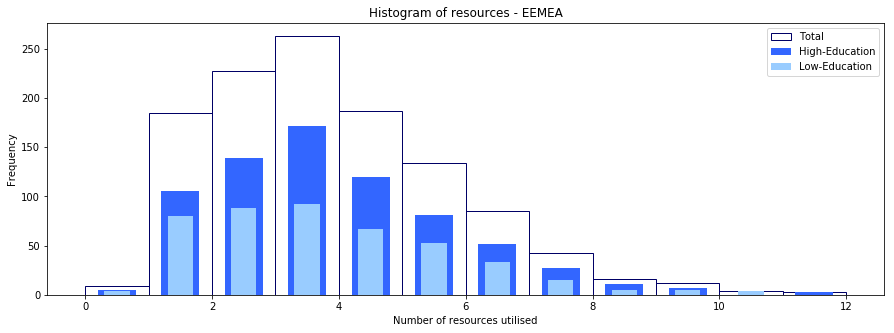

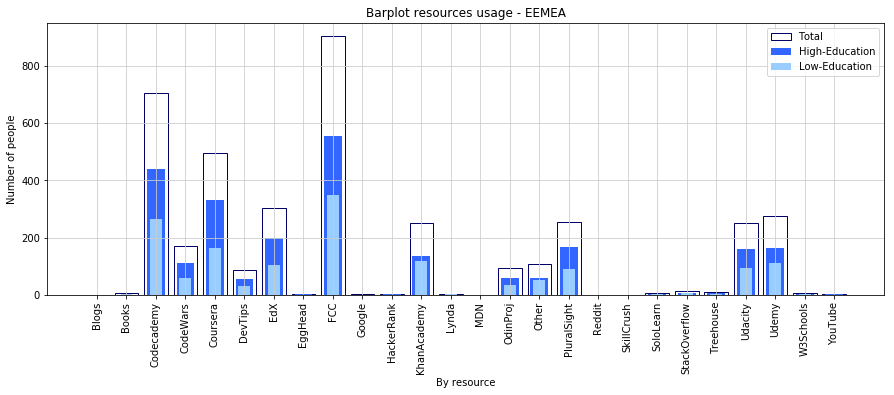

In [18]:
create_histogram('EEMEA', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('EEMEA', df_total_education, df_high_education, df_low_education, labels)

<h2>WER</h2>

In [19]:
#Select only CountryLive that belong to WER
wer = ['Albania','Andorra','Austria','Belgium','Bosnia & Herzegovina','Bulgaria','Channel Islands','Croatia','Cyprus',
       'Czech Republic','Denmark','Estonia','Finland','France','Germany','Great Britain','Greece','Hungary','Iceland',
       'Ireland','Isle of Man','Italy','Latvia','Lithuania','Luxembourg','Macedonia','Malta','Monaco',
       'Netherlands (Holland, Europe)','Norway','Poland','Portugal','Republic of Montenegro','Republic of Serbia',
       'Romania','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','United Kingdom']

#Remove all countries not listed in WER
df_selected_wer = df_selected[df_selected.CountryLive.isin(wer)]

df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected_wer, 'WER')

Total Resources - WER:

count    2785.000000
mean        3.249192
std         1.894398
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - WER:

count    1537.000000
mean        3.225114
std         1.833235
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - WER:

count    1248.000000
mean        3.278846
std         1.967450
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - WER:

count    551.000000
mean       5.194192
std        2.099446
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       12.000000
Name: TotalResources, dtype: float64

Total Resources for High Educa

<p align="justify">
<h3>Conclusion 3:</h3>
We can see from statistic data above that between high-level education and low-level education in WER the difference is not significant but people with low-education tend to use 2% more resources that people with high-level education (by comparing the means listed above). Below the histogram with comparison between high and low level education.
</p>
<p align="justify">
<h3>Conclusion 4:</h3>
We can see from graphic below that in the countries that are part of WER Udacity is on 8th Place.
</p>

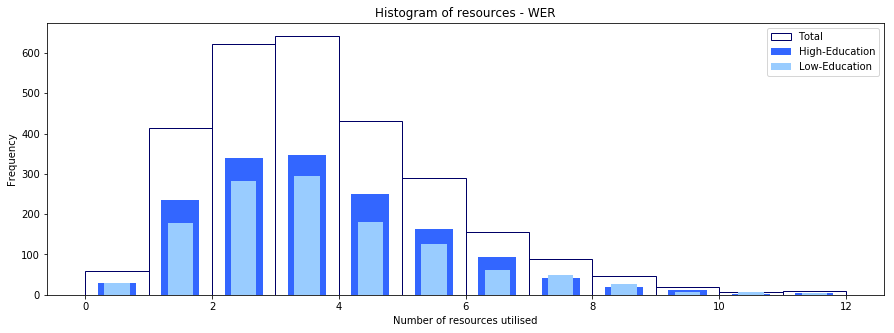

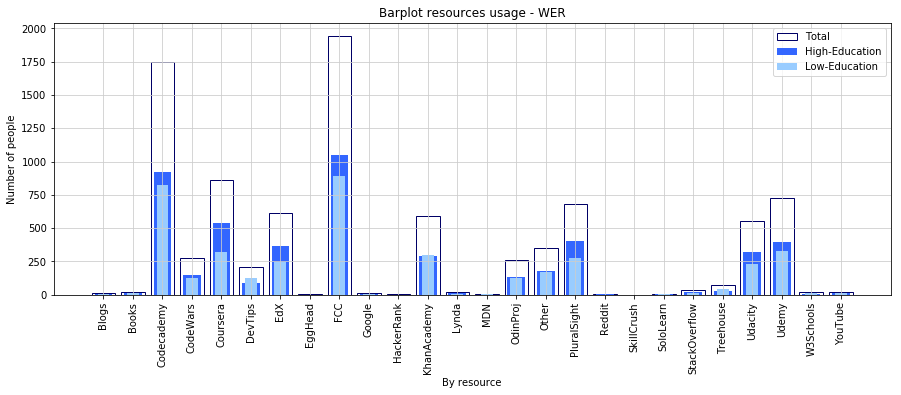

In [20]:
create_histogram('WER', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('WER', df_total_education, df_high_education, df_low_education, labels)

<h2>Global</h2>

In [21]:
df_total_education, df_high_education, df_low_education, labels = feed_variables(df_selected, 'Global')

Total Resources - Global:

count    13506.000000
mean         3.333185
std          1.906451
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: TotalResources, dtype: float64

Total Resources for High Education - Global:

count    8491.000000
mean        3.304911
std         1.863656
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education - Global:

count    5015.000000
mean        3.381057
std         1.976063
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: TotalResources, dtype: float64

Total Resources for Udacity Students - Global:

count    2904.000000
mean        5.168388
std         1.973355
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        15.000000
Name: TotalResources, dtype: float64

To

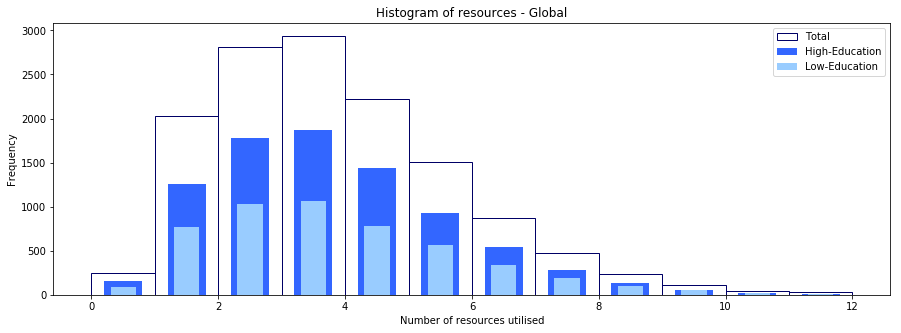

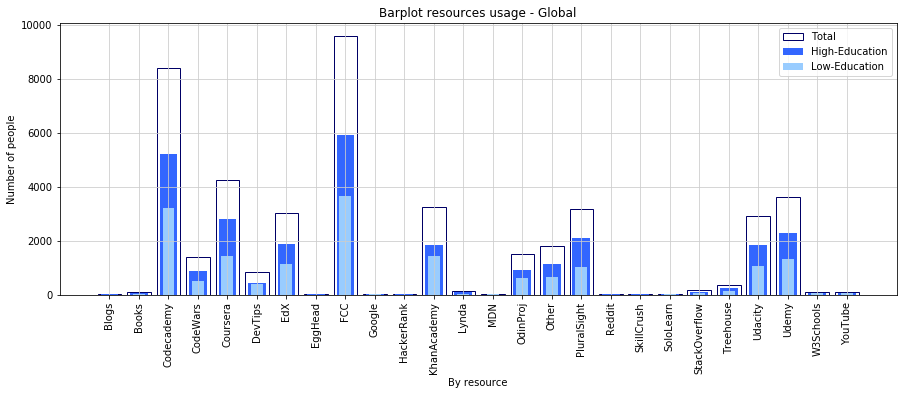

In [22]:
create_histogram('Global', df_total_education, df_high_education, df_low_education, labels)
create_bar_graph('Global', df_total_education, df_high_education, df_low_education, labels)

In [23]:
#Sort and take top 5
#Transform lists in dictionaries
#print(labels)
#print(resource_count)
global_totals = dict(zip(labels, resource_count))
#print(global_totals)
top10 = sorted(global_totals.items(), key=lambda x:x[1], reverse=True)
top10_labels = []
top10_count_resource = []
for resource, count_resource in top10:
    top10_labels.append(resource)
    top10_count_resource.append(count_resource)
#print(top10_labels[:10])
#print(top10_count_resource[:10])

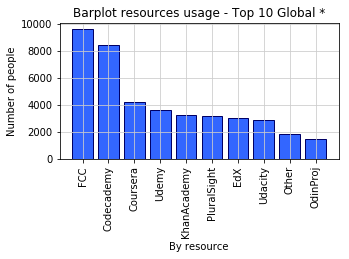

In [24]:
#Create top 5 barplot
plt.figure(figsize=(5,2.5))
x_bar = [i for i, _ in enumerate(top10_labels[:10])]
plt.bar(x_bar, top10_count_resource[:10], width = 0.80, edgecolor = '#000066', facecolor = '#3366FF', label='Total')
plt.xlabel('By resource')
plt.ylabel('Number of people')
plt.xticks(x_bar, top10_labels[:10], rotation='vertical')
plt.title('Barplot resources usage - Top 10 Global *')
plt.grid(True, color = '#CCCCCC')
plt.show()